In [1]:

import pandas as pd
from sklearn import svm
import libsvm  as ls
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import top_k_accuracy_score


ModuleNotFoundError: No module named 'sklearn'

**NOTE** : Please enter Category Names same as folder name

In [2]:
Categories=['ant','beaver', 'cup','ewer', 'lamp','pizza', 'rhino','elephant','dolphin','crab']


In [3]:
# main_folder_path = './data/caltech-101/101_ObjectCategories'

# Categories = os.listdir(main_folder_path)
# Categories

In [4]:

flat_data_arr=[]
target_arr=[]

datadir='./data/caltech-101/101_ObjectCategories' 
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(30,30,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : ant
loaded category:ant successfully
loading... category : beaver
loaded category:beaver successfully
loading... category : cup
loaded category:cup successfully
loading... category : ewer
loaded category:ewer successfully
loading... category : lamp
loaded category:lamp successfully
loading... category : pizza
loaded category:pizza successfully
loading... category : rhino
loaded category:rhino successfully
loading... category : elephant
loaded category:elephant successfully
loading... category : dolphin
loaded category:dolphin successfully
loading... category : crab
loaded category:crab successfully


,0,1,2,3,4,5,6,7,8,9,...,2691,2692,2693,2694,2695,2696,2697,2698,2699,Target
0,9.809019e-02,0.102507,0.188686,9.871258e-02,1.051867e-01,1.878433e-01,0.114509,0.123648,0.177509,3.254690e-01,...,0.646957,0.610431,0.612689,0.649940,0.602855,0.611951,6.427757e-01,0.595683,0.603774,0
1,5.801917e-08,0.000014,0.000020,2.030937e-04,9.159553e-04,8.900180e-04,0.015372,0.018944,0.018630,1.197845e-01,...,0.007819,0.009301,0.005415,0.000046,0.000077,0.000121,8.264312e-08,0.000005,0.000002,0
2,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.875051e-09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0
3,1.635179e-01,0.300259,0.237979,2.105695e-01,4.652854e-01,3.364635e-01,0.215489,0.469478,0.338418,2.154944e-01,...,0.208688,0.469678,0.341051,0.207696,0.463160,0.336624,1.672291e-01,0.302272,0.226954,0
4,0.000000e+00,0.000000,0.000000,6.592130e-07,6.592130e-07,6.592130e-07,0.002352,0.002352,0.002352,1.957863e-01,...,0.001977,0.001977,0.001977,0.000002,0.000002,0.000002,0.000000e+00,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,4.758968e-01,0.247862,0.484286,5.022639e-01,2.811836e-01,5.152581e-01,0.486386,0.285039,0.523255,4.946682e-01,...,0.419105,0.496122,0.517652,0.312572,0.393984,0.434915,1.530300e-01,0.223305,0.243674,9
601,1.284211e-01,0.165072,0.205863,1.664843e-01,2.054430e-01,2.381510e-01,0.204826,0.247424,0.268128,2.117930e-01,...,0.269100,0.261999,0.251272,0.167006,0.217366,0.229693,1.554699e-01,0.208980,0.222792,9
602,1.808395e-01,0.670036,0.922359,1.734240e-01,6.508871e-01,8.980753e-01,0.175239,0.609393,0.830403,1.875628e-01,...,0.197551,0.662593,0.903688,0.177837,0.670540,0.923457,1.676727e-01,0.672826,0.917277,9
603,2.542317e-01,0.310003,0.314955,2.524143e-01,3.019822e-01,2.852427e-01,0.407613,0.437538,0.392011,4.551463e-01,...,0.282428,0.348818,0.389705,0.322992,0.332780,0.350641,1.617047e-01,0.185950,0.192772,9


In [5]:
k=5

## LIBSVM

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [7]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf' ,'poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model. fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete


The Model is trained well with the given images


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [8]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 3, 3, 2, 9, 1, 8, 2, 5, 3, 9, 4, 4, 8, 1, 3, 9, 6, 1, 4, 3, 7,
       3, 5, 7, 7, 3, 5, 3, 3, 7, 1, 1, 0, 4, 8, 9, 9, 6, 6, 9, 9, 8, 7,
       3, 5, 4, 7, 5, 7, 9, 8, 7, 6, 9, 3, 9, 9, 1, 8, 4, 6, 3, 2, 3, 3,
       0, 8, 2, 2, 8, 8, 5, 3, 7, 2, 3, 8, 4, 1, 9, 8, 1, 8, 8, 5, 7, 2,
       3, 7, 5, 6, 5, 1, 9, 3, 9, 8, 3, 0, 3, 9, 2, 1, 6, 2, 6, 6, 1, 4,
       4, 3, 2, 2, 7, 5, 0, 6, 6, 9, 6])

In [9]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 3, 3, 4, 9, 1, 8, 0, 5, 7, 9, 4, 4, 8, 2, 3, 3, 9, 0, 2, 2, 1,
       4, 5, 7, 7, 2, 5, 6, 3, 6, 1, 1, 4, 7, 8, 9, 4, 7, 6, 6, 9, 3, 7,
       1, 5, 7, 3, 5, 1, 2, 8, 7, 8, 1, 3, 5, 2, 3, 4, 4, 6, 2, 8, 3, 2,
       3, 8, 9, 9, 8, 8, 5, 3, 4, 2, 3, 8, 6, 1, 9, 7, 0, 8, 8, 5, 6, 2,
       3, 7, 5, 9, 9, 9, 6, 3, 1, 0, 3, 0, 7, 9, 0, 2, 6, 6, 7, 0, 8, 4,
       4, 4, 9, 3, 9, 5, 5, 7, 6, 9, 6])

In [10]:

print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")


The model is 49.586776859504134% accurate


In [11]:
decision_scores = model.decision_function(x_test)
decision_scores

array([[ 9.30687009,  1.73460614,  6.28341803, ...,  3.73952817,
         8.27564737,  7.26032825],
       [ 6.25815813,  3.7687932 ,  8.29003597, ..., -0.30271537,
         7.24365638,  0.7121095 ],
       [ 3.80018816,  7.27316067,  2.73934354, ...,  5.17115197,
         1.73983324,  8.28378825],
       ...,
       [ 6.20114644,  7.2690514 ,  2.83609312, ...,  8.28676746,
         1.73171137,  5.1283624 ],
       [ 6.25075235,  7.27440517,  1.75306375, ...,  3.82674246,
         1.73360185,  9.29813342],
       [ 5.18233537,  6.21548165,  0.71348264, ...,  8.3003468 ,
         0.699525  ,  7.28368714]])

In [12]:
top_k_predict = top_k_accuracy_score(y_test, decision_scores, k=k)
print(f"The model is {top_k_predict*100}% accurate for k= {k}")


The model is 89.25619834710744% accurate for k= 5


#   SVM Kernel

Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

Splitting the data into training and testing data

In [13]:
decision_scores_arr = []

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [15]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf' ,'poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete


The Model is trained well with the given images


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Predicting our testing data

In [16]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 3, 3, 2, 9, 1, 8, 2, 5, 3, 9, 4, 4, 8, 1, 3, 9, 6, 1, 4, 3, 7,
       3, 5, 7, 7, 3, 5, 3, 3, 7, 1, 1, 0, 4, 8, 9, 9, 6, 6, 9, 9, 8, 7,
       3, 5, 4, 7, 5, 7, 9, 8, 7, 6, 9, 3, 9, 9, 1, 8, 4, 6, 3, 2, 3, 3,
       0, 8, 2, 2, 8, 8, 5, 3, 7, 2, 3, 8, 4, 1, 9, 8, 1, 8, 8, 5, 7, 2,
       3, 7, 5, 6, 5, 1, 9, 3, 9, 8, 3, 0, 3, 9, 2, 1, 6, 2, 6, 6, 1, 4,
       4, 3, 2, 2, 7, 5, 0, 6, 6, 9, 6])

In [17]:
decision_scores = model.decision_function(x_test)
decision_scores_arr.append(('orginal', decision_scores))
decision_scores

array([[ 9.30687009,  1.73460614,  6.28341803, ...,  3.73952817,
         8.27564737,  7.26032825],
       [ 6.25815813,  3.7687932 ,  8.29003597, ..., -0.30271537,
         7.24365638,  0.7121095 ],
       [ 3.80018816,  7.27316067,  2.73934354, ...,  5.17115197,
         1.73983324,  8.28378825],
       ...,
       [ 6.20114644,  7.2690514 ,  2.83609312, ...,  8.28676746,
         1.73171137,  5.1283624 ],
       [ 6.25075235,  7.27440517,  1.75306375, ...,  3.82674246,
         1.73360185,  9.29813342],
       [ 5.18233537,  6.21548165,  0.71348264, ...,  8.3003468 ,
         0.699525  ,  7.28368714]])

In [18]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 3, 3, 4, 9, 1, 8, 0, 5, 7, 9, 4, 4, 8, 2, 3, 3, 9, 0, 2, 2, 1,
       4, 5, 7, 7, 2, 5, 6, 3, 6, 1, 1, 4, 7, 8, 9, 4, 7, 6, 6, 9, 3, 7,
       1, 5, 7, 3, 5, 1, 2, 8, 7, 8, 1, 3, 5, 2, 3, 4, 4, 6, 2, 8, 3, 2,
       3, 8, 9, 9, 8, 8, 5, 3, 4, 2, 3, 8, 6, 1, 9, 7, 0, 8, 8, 5, 6, 2,
       3, 7, 5, 9, 9, 9, 6, 3, 1, 0, 3, 0, 7, 9, 0, 2, 6, 6, 7, 0, 8, 4,
       4, 4, 9, 3, 9, 5, 5, 7, 6, 9, 6])

In [19]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 49.586776859504134% accurate


In [20]:
top_k_predict = top_k_accuracy_score(y_test, decision_scores, k=k)
print(f"The model is {top_k_predict*100}% accurate for k= {k}")


The model is 89.25619834710744% accurate for k= 5


# SVM with WM (Wavelet Moments) Image Filter 

In [21]:
import cv2
import pywt
from sklearn.metrics import hinge_loss


In [62]:
n_feature_arr = []
loss_v_arr = []
df_arr = []

In [100]:
def extract_wm_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    coeffs = pywt.wavedec2(gray_image, 'db1', level=4)
    
    wm_features = []
    for level in range(1, len(coeffs)):
        for direction in range(0, len(coeffs[level])):
            wm = np.mean(np.abs(coeffs[level][direction]))
            wm_features.append(wm)
    
    return np.array(wm_features)

In [120]:
flat_data_arr=[]
target_arr=[]

datadir='./data/caltech-101/101_ObjectCategories' 
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    img_resized = cv2.resize(img_array, (40, 40))

    wm_features = extract_wm_features(img_resized)
    flat_data_arr.append(wm_features)
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : ant
loaded category:ant successfully
loading... category : beaver
loaded category:beaver successfully
loading... category : cup
loaded category:cup successfully
loading... category : ewer
loaded category:ewer successfully
loading... category : lamp
loaded category:lamp successfully
loading... category : pizza
loaded category:pizza successfully
loading... category : rhino
loaded category:rhino successfully
loading... category : elephant
loaded category:elephant successfully
loading... category : dolphin
loaded category:dolphin successfully
loading... category : crab
loaded category:crab successfully


,0,1,2,3,4,5,6,7,8,9,10,11,Target
0,167.715278,131.729167,122.576389,83.830,91.180,52.070,32.6850,35.9950,19.2550,11.49250,14.10250,8.59000,0
1,188.902778,126.027778,94.902778,99.790,95.180,47.120,40.5100,36.8250,25.0250,19.40500,15.96250,14.48500,0
2,210.312500,193.868056,30.020833,122.540,85.580,71.940,42.2800,32.8050,25.8550,22.47250,19.28500,17.64500,0
3,105.298611,64.298611,35.826389,120.080,83.940,39.750,57.3650,51.1100,17.4450,27.91000,27.14750,10.06250,0
4,294.013889,284.236111,116.805556,160.880,158.490,104.880,54.9800,53.5300,41.0750,24.59750,23.92500,20.87750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,152.590278,112.493056,46.548611,92.935,99.305,69.005,47.4575,60.2475,38.0525,25.51875,28.75375,19.40875,9
601,84.444444,49.597222,44.513889,52.005,52.705,43.245,32.1825,52.0125,25.5025,19.10375,24.16625,17.54375,9
602,83.958333,96.930556,43.930556,73.900,85.620,43.880,42.6850,45.5400,28.0500,25.41250,20.80500,17.59250,9
603,125.708333,110.138889,59.694444,63.795,79.675,53.395,51.3625,47.6775,32.4025,29.74125,27.94625,24.92125,9


In [121]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
df_arr.append(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [26]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [27]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([6, 1, 8, 3, 8, 9, 3, 0, 6, 6, 9, 3, 3, 8, 8, 8, 2, 8, 8, 0, 9, 8,
       4, 8, 7, 8, 3, 6, 6, 8, 8, 0, 8, 3, 6, 8, 8, 3, 7, 0, 9, 9, 8, 8,
       9, 5, 9, 3, 9, 3, 3, 8, 7, 7, 8, 3, 9, 8, 3, 4, 4, 8, 8, 9, 8, 9,
       8, 8, 9, 8, 8, 8, 8, 3, 3, 8, 3, 8, 8, 8, 7, 8, 8, 8, 7, 2, 8, 2,
       8, 1, 8, 8, 5, 5, 8, 7, 5, 0, 3, 0, 3, 3, 5, 7, 6, 8, 3, 3, 8, 4,
       3, 8, 7, 8, 5, 8, 3, 0, 3, 5, 3])

In [53]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 3, 3, 4, 9, 1, 8, 0, 5, 7, 9, 4, 4, 8, 2, 3, 3, 9, 0, 2, 2, 1,
       4, 5, 7, 7, 2, 5, 6, 3, 6, 1, 1, 4, 7, 8, 9, 4, 7, 6, 6, 9, 3, 7,
       1, 5, 7, 3, 5, 1, 2, 8, 7, 8, 1, 3, 5, 2, 3, 4, 4, 6, 2, 8, 3, 2,
       3, 8, 9, 9, 8, 8, 5, 3, 4, 2, 3, 8, 6, 1, 9, 7, 0, 8, 8, 5, 6, 2,
       3, 7, 5, 9, 9, 9, 6, 3, 1, 0, 3, 0, 7, 9, 0, 2, 6, 6, 7, 0, 8, 4,
       4, 4, 9, 3, 9, 5, 5, 7, 6, 9, 6])

In [54]:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 26.446280991735538% accurate


In [55]:
decision_scores = model.decision_function(x_test)
decision_scores_arr.append(('WM', decision_scores))

decision_scores

array([[-0.30134003,  2.78882038,  1.75220329, ...,  6.2686076 ,
         7.24103365,  8.28165173],
       [ 3.70140397,  9.32350385,  7.3271092 , ...,  3.72480378,
         1.68597612,  0.67342327],
       [ 0.71197626,  2.73685858,  1.73216912, ...,  5.23361246,
         9.2886336 ,  5.25289056],
       ...,
       [-0.2965371 ,  2.80819659,  4.07066189, ...,  6.0862943 ,
         8.28184403,  3.96982433],
       [ 2.70504771,  5.19596865,  2.85290985, ...,  7.23553041,
         6.12644692,  8.31451608],
       [-0.28513787,  1.87192328,  2.76964535, ...,  3.78098204,
         8.29295994,  4.83405992]])

In [56]:
top_k_predict = top_k_accuracy_score(y_test, decision_scores, k=k)
print(f"The model is {top_k_predict*100}% accurate for k= {k}")


The model is 75.20661157024794% accurate for k= 5


In [63]:
# calculate hinge loss
loss = hinge_loss(y_test, decision_scores)
loss_v_arr.append(loss)
n_feature_arr.append(x.shape[1])

# SVM with LBP (Local Binary Pattern) Image Filter


In [64]:

def extract_lbp_features(photo):
  def assign_bit(picture, x, y, c):   #comparing bit with threshold value of centre pixel
      bit = 0  
      try:          
          if picture[x][y] >= c: 
              bit = 1         
      except: 
          pass
      return bit 
  def local_bin_val(picture, x, y):  #calculating local binary pattern value of a pixel
      eight_bit_binary = []
      centre = picture[x][y] 
      powers = [1, 2, 4, 8, 16, 32, 64, 128] 
      decimal_val = 0
      #starting from top right,assigning bit to pixels clockwise 
      eight_bit_binary.append(assign_bit(picture, x-1, y + 1,centre)) 
      eight_bit_binary.append(assign_bit(picture, x, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x-1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x-1, y, centre))     
      #calculating decimal value of the 8-bit binary number
      for i in range(len(eight_bit_binary)): 
          decimal_val += eight_bit_binary[i] * powers[i] 
            
      return decimal_val 
  m, n, _ = photo.shape 
  gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
  lbp_photo = np.zeros((m, n),np.uint8) 
  # converting image to lbp
  for i in range(0,m): 
      for j in range(0,n): 
          lbp_photo[i, j] = local_bin_val(gray_scale, i, j) 
     
  return lbp_photo.flatten()

In [122]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='E:/University/Tarbiat Modarres/Term1/Machin Learning/Article/Code/data/caltech-101/101_ObjectCategories' 
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    img_resized = cv2.resize(img_array, (30, 30))

    wm_features = extract_lbp_features(img_resized)
    flat_data_arr.append(wm_features)
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : ant
loaded category:ant successfully
loading... category : beaver
loaded category:beaver successfully
loading... category : cup
loaded category:cup successfully
loading... category : ewer
loaded category:ewer successfully
loading... category : lamp
loaded category:lamp successfully
loading... category : pizza
loaded category:pizza successfully
loading... category : rhino
loaded category:rhino successfully
loading... category : elephant
loaded category:elephant successfully
loading... category : dolphin
loaded category:dolphin successfully
loading... category : crab
loaded category:crab successfully


,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,Target
0,245,239,223,199,195,199,195,195,195,195,...,227,195,227,67,128,224,227,195,192,0
1,255,255,14,0,60,62,14,8,56,48,...,227,227,227,227,227,128,227,227,224,0
2,255,255,255,255,255,255,255,255,207,223,...,224,225,227,227,227,227,227,227,224,0
3,127,31,191,255,254,28,62,62,62,60,...,227,227,227,227,227,195,193,227,224,0
4,255,255,255,14,0,42,6,6,46,56,...,35,163,227,227,224,227,227,227,224,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,150,105,183,201,246,104,63,10,20,60,...,130,0,32,35,129,224,224,96,224,9
601,31,30,2,0,43,148,107,148,255,95,...,227,0,224,99,3,128,226,65,160,9
602,161,243,225,247,237,251,85,239,213,237,...,0,34,2,2,0,35,160,96,224,9
603,0,246,2,0,32,44,56,54,14,8,...,163,2,0,226,64,35,0,32,160,9


In [123]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
df_arr.append(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [67]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [68]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([8, 4, 4, 7, 7, 3, 7, 2, 3, 3, 9, 3, 3, 3, 8, 3, 3, 3, 8, 7, 3, 6,
       4, 9, 0, 3, 2, 3, 6, 2, 7, 6, 3, 4, 3, 9, 3, 4, 2, 6, 3, 4, 4, 3,
       8, 3, 3, 3, 6, 7, 2, 3, 7, 7, 9, 3, 6, 9, 7, 3, 5, 2, 4, 3, 3, 7,
       2, 6, 9, 2, 9, 9, 8, 8, 7, 4, 3, 8, 4, 3, 9, 3, 2, 8, 8, 7, 3, 2,
       4, 9, 3, 3, 0, 3, 3, 0, 4, 0, 3, 8, 3, 1, 2, 3, 9, 6, 7, 3, 0, 3,
       4, 2, 3, 3, 8, 9, 6, 3, 6, 3, 6])

In [69]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 3, 3, 4, 9, 1, 8, 0, 5, 7, 9, 4, 4, 8, 2, 3, 3, 9, 0, 2, 2, 1,
       4, 5, 7, 7, 2, 5, 6, 3, 6, 1, 1, 4, 7, 8, 9, 4, 7, 6, 6, 9, 3, 7,
       1, 5, 7, 3, 5, 1, 2, 8, 7, 8, 1, 3, 5, 2, 3, 4, 4, 6, 2, 8, 3, 2,
       3, 8, 9, 9, 8, 8, 5, 3, 4, 2, 3, 8, 6, 1, 9, 7, 0, 8, 8, 5, 6, 2,
       3, 7, 5, 9, 9, 9, 6, 3, 1, 0, 3, 0, 7, 9, 0, 2, 6, 6, 7, 0, 8, 4,
       4, 4, 9, 3, 9, 5, 5, 7, 6, 9, 6])

In [70]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 23.96694214876033% accurate


In [71]:
decision_scores = model.decision_function(x_test)
decision_scores_arr.append(('LBP', decision_scores))

decision_scores


array([[ 8.2441143 ,  0.74338672,  7.23152918, ...,  2.82275813,
         9.25425886,  6.18037061],
       [ 2.82379922,  0.76965642,  4.8620927 , ...,  2.78609792,
         8.2498992 ,  7.08231301],
       [-0.27357053,  5.87059066,  0.78107287, ...,  3.85267453,
         5.91333465,  3.85677063],
       ...,
       [ 1.83127299,  0.77999748, -0.22655881, ...,  3.93028892,
         5.10226329,  6.13952168],
       [ 1.81850583,  3.9418275 ,  0.77690618, ...,  2.85803289,
         6.1666946 ,  7.20750632],
       [ 2.8810633 ,  5.06221306,  5.09498567, ...,  7.14798082,
         7.1955853 ,  2.95750375]])

In [72]:

top_k_predict = top_k_accuracy_score(y_test, decision_scores, k=k)
print(f"The model is {top_k_predict*100}% accurate for k= {k}")


The model is 73.55371900826447% accurate for k= 5


In [73]:
# calculate hinge loss
loss = hinge_loss(y_test, decision_scores)
loss_v_arr.append(loss)
n_feature_arr.append(x.shape[1])

# SVM with Corr Image Filter


In [74]:
from scipy.ndimage import correlate


In [75]:
def extract_corr_features(image):
   
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    corr_image = correlate(gray_image, np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]]), mode='constant', cval=0.0)
    
    corr_features = corr_image.flatten()
    
    return corr_features

In [132]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='E:/University/Tarbiat Modarres/Term1/Machin Learning/Article/Code/data/caltech-101/101_ObjectCategories' 
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    img_resized = cv2.resize(img_array, (30, 30))

    wm_features = extract_corr_features(img_resized)
    flat_data_arr.append(wm_features)
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : ant
loaded category:ant successfully
loading... category : beaver
loaded category:beaver successfully
loading... category : cup
loaded category:cup successfully
loading... category : ewer
loaded category:ewer successfully
loading... category : lamp
loaded category:lamp successfully
loading... category : pizza
loaded category:pizza successfully
loading... category : rhino
loaded category:rhino successfully
loading... category : elephant
loaded category:elephant successfully
loading... category : dolphin
loaded category:dolphin successfully
loading... category : crab
loaded category:crab successfully


,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,Target
0,117,189,7,245,92,138,128,109,89,96,...,111,67,77,27,253,49,74,58,250,0
1,0,3,112,185,105,134,57,16,93,146,...,184,184,184,184,186,130,51,1,0,0
2,0,0,0,0,0,0,1,105,186,235,...,3,119,11,6,1,0,0,0,0,0
3,105,69,151,152,154,145,154,152,153,154,...,159,156,155,157,160,155,146,83,108,0
4,0,0,99,45,89,7,251,250,2,253,...,255,2,3,3,129,122,124,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,28,203,245,203,233,193,191,228,204,26,...,10,69,65,10,144,133,143,179,246,9
601,106,131,23,205,91,77,119,84,222,150,...,123,204,239,243,90,64,120,41,133,9
602,10,39,0,189,179,190,112,34,83,165,...,215,233,163,143,47,4,40,107,74,9
603,147,137,68,108,15,109,26,189,35,195,...,30,87,255,79,20,74,77,0,76,9


In [133]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
df_arr.append(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [78]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [79]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([6, 9, 7, 3, 5, 6, 9, 3, 7, 0, 3, 4, 4, 4, 8, 7, 3, 4, 1, 9, 2, 9,
       3, 1, 8, 9, 7, 6, 3, 3, 7, 1, 2, 9, 8, 7, 6, 5, 9, 1, 7, 1, 3, 3,
       9, 9, 4, 7, 0, 7, 0, 9, 4, 7, 9, 3, 4, 0, 2, 3, 3, 9, 9, 8, 3, 7,
       7, 3, 9, 2, 3, 9, 5, 8, 5, 5, 9, 6, 6, 6, 9, 5, 8, 7, 8, 9, 6, 9,
       9, 0, 9, 7, 9, 7, 2, 6, 9, 0, 7, 7, 7, 3, 8, 9, 9, 9, 0, 6, 9, 0,
       1, 8, 8, 9, 6, 5, 3, 8, 7, 8, 6])

In [80]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 3, 3, 4, 9, 1, 8, 0, 5, 7, 9, 4, 4, 8, 2, 3, 3, 9, 0, 2, 2, 1,
       4, 5, 7, 7, 2, 5, 6, 3, 6, 1, 1, 4, 7, 8, 9, 4, 7, 6, 6, 9, 3, 7,
       1, 5, 7, 3, 5, 1, 2, 8, 7, 8, 1, 3, 5, 2, 3, 4, 4, 6, 2, 8, 3, 2,
       3, 8, 9, 9, 8, 8, 5, 3, 4, 2, 3, 8, 6, 1, 9, 7, 0, 8, 8, 5, 6, 2,
       3, 7, 5, 9, 9, 9, 6, 3, 1, 0, 3, 0, 7, 9, 0, 2, 6, 6, 7, 0, 8, 4,
       4, 4, 9, 3, 9, 5, 5, 7, 6, 9, 6])

In [81]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 17.355371900826448% accurate


In [82]:
decision_scores = model.decision_function(x_test)
decision_scores_arr.append(('Corr', decision_scores))
decision_scores


array([[ 2.78200991,  2.8194903 ,  6.21875925, ...,  8.24297849,
         0.76835832,  8.24816135],
       [ 4.95948995, -0.25799557,  6.05993898, ...,  7.21348454,
         0.75989366,  9.26868677],
       [ 1.85318079,  5.03544202,  5.01622715, ...,  9.27632939,
        -0.27097033,  7.18202688],
       ...,
       [ 0.7688288 ,  5.14218733,  1.79153328, ...,  9.25685009,
         7.19108635,  6.14869793],
       [ 3.94860972,  0.78664904, -0.23449562, ...,  7.16816375,
         9.21781183,  6.14633635],
       [ 3.91186642, -0.2243024 ,  1.89805897, ...,  7.12751461,
         6.02317142,  8.22674655]])

In [83]:

top_k_predict = top_k_accuracy_score(y_test, decision_scores, k=k)
print(f"The model is {top_k_predict*100}% accurate for k= {k}")


The model is 66.94214876033058% accurate for k= 5


In [84]:
# calculate hinge loss
loss = hinge_loss(y_test, decision_scores)
loss_v_arr.append(loss)
n_feature_arr.append(x.shape[1])

## Fusion Feature


enter weight of views

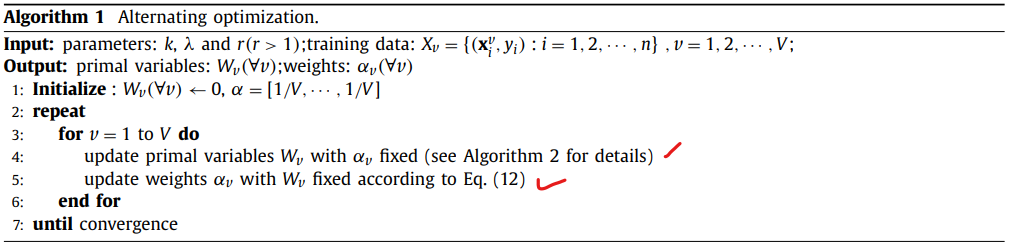

In [86]:
##  wm  , lbs , corr
r = 1.5
V = 3
a = 1/V # initial alpha
weights=[a , a , a]
weights

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [96]:
loss_param_arr = []

for v in range(V) :
    n = n_feature_arr[v] 
    loss = loss_v_arr[v]    
    _r = 1/r-1
    param =  (1/(n*loss))**_r
    loss_param_arr.append(param)

new_weights = [loss_param_arr[v]/(np.einsum("i->",loss_param_arr)) for v in range(V)]
new_weights

[0.1020128585257917, 0.43753088116384153, 0.4604562603103667]

### Top-k SVM 

In [135]:
df_arr2 = [new_weights[v]*df_arr[v] for v in range(V)]

In [137]:
df = pd.concat(df_arr2 , axis=1)

In [138]:
df

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,17.109115,13.438069,12.504368,8.551738,9.301532,5.311810,3.334290,3.671953,1.964258,1.172383,...,18.878707,51.110645,30.850569,35.455132,12.432319,116.495434,22.562357,34.073763,26.706463,115.114065
1,19.270512,12.856454,9.681304,10.179863,9.709584,4.806846,4.132541,3.756624,2.552872,1.979560,...,84.723952,84.723952,84.723952,84.723952,84.723952,85.644864,59.859314,23.483269,0.460456,0.000000
2,21.454579,19.777035,3.062511,12.500656,8.730260,7.338805,4.313104,3.346532,2.637542,2.292484,...,33.152851,1.381369,54.794295,5.065019,2.762738,0.460456,0.000000,0.000000,0.000000,0.000000
3,10.741812,6.559285,3.654752,12.249704,8.562959,4.055011,5.851968,5.213877,1.779614,2.847179,...,65.845245,73.212545,71.831177,71.370720,72.291633,73.673002,71.370720,67.226614,38.217870,49.729276
4,29.993197,28.995738,11.915669,16.411829,16.168018,10.699109,5.608667,5.460748,4.190178,2.509261,...,116.955890,117.416346,0.920913,1.381369,1.381369,59.398858,56.175664,57.096576,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,15.566170,11.475738,4.748557,9.480565,10.130387,7.039397,4.841275,6.146020,3.881844,2.603241,...,85.184408,4.604563,31.771482,29.929657,4.604563,66.305701,61.240683,65.845245,82.421671,113.272240
601,8.614419,5.059554,4.540989,5.305179,5.376588,4.411546,3.283029,5.305944,2.601583,1.948828,...,53.873382,56.636120,93.933077,110.049046,111.890871,41.441063,29.469201,55.254751,18.878707,61.240683
602,8.564830,9.888163,4.481482,7.538750,8.734341,4.476324,4.354419,4.645666,2.861461,2.592402,...,23.022813,98.998096,107.286309,75.054370,65.845245,21.641444,1.841825,18.418250,49.268820,34.073763
603,12.823866,11.235583,6.089601,6.507910,8.127875,5.446977,5.239635,4.863718,3.305472,3.033990,...,75.514827,13.813688,40.059695,117.416346,36.376045,9.209125,34.073763,35.455132,0.000000,34.994676


In [139]:
x=df.iloc[:,:-1]
y = y
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [142]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [143]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([2, 4, 4, 7, 7, 3, 7, 2, 3, 9, 9, 4, 4, 3, 8, 3, 3, 6, 3, 9, 9, 9,
       4, 9, 8, 3, 2, 3, 3, 3, 7, 5, 3, 4, 3, 9, 7, 4, 9, 8, 7, 9, 3, 3,
       8, 3, 7, 7, 0, 7, 5, 3, 6, 7, 9, 3, 7, 0, 7, 3, 8, 9, 4, 8, 3, 7,
       9, 3, 9, 2, 9, 9, 5, 8, 7, 4, 9, 8, 9, 9, 9, 9, 8, 8, 8, 7, 7, 2,
       3, 9, 9, 7, 0, 5, 3, 0, 9, 0, 3, 9, 7, 2, 2, 9, 9, 6, 9, 6, 0, 4,
       4, 3, 7, 7, 6, 0, 6, 3, 6, 9, 6])

In [144]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 3, 3, 4, 9, 1, 8, 0, 5, 7, 9, 4, 4, 8, 2, 3, 3, 9, 0, 2, 2, 1,
       4, 5, 7, 7, 2, 5, 6, 3, 6, 1, 1, 4, 7, 8, 9, 4, 7, 6, 6, 9, 3, 7,
       1, 5, 7, 3, 5, 1, 2, 8, 7, 8, 1, 3, 5, 2, 3, 4, 4, 6, 2, 8, 3, 2,
       3, 8, 9, 9, 8, 8, 5, 3, 4, 2, 3, 8, 6, 1, 9, 7, 0, 8, 8, 5, 6, 2,
       3, 7, 5, 9, 9, 9, 6, 3, 1, 0, 3, 0, 7, 9, 0, 2, 6, 6, 7, 0, 8, 4,
       4, 4, 9, 3, 9, 5, 5, 7, 6, 9, 6])

In [145]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 27.27272727272727% accurate


In [146]:
decision_scores = model.decision_function(x_test)
decision_scores_arr.append(('Corr', decision_scores))
decision_scores


array([[ 6.13549932, -0.24556434,  9.23645671, ...,  5.11608529,
         4.10587355,  8.22624484],
       [ 3.9314745 , -0.23484891,  2.83286448, ...,  4.88081313,
         7.17557191,  8.22380027],
       [-0.25816341,  4.94357092,  0.78778745, ...,  7.20118026,
         1.78462939,  6.11131587],
       ...,
       [ 1.80696671,  2.85981259, -0.22920407, ...,  8.19730436,
         7.1560444 ,  6.12883064],
       [ 2.85789924,  1.83387512, -0.23218932, ...,  5.08582543,
         7.1933376 ,  9.21206511],
       [ 3.91713831,  0.83006932,  2.91005687, ...,  7.15247478,
         6.15165321,  8.17703824]])

In [147]:

top_k_predict = top_k_accuracy_score(y_test, decision_scores, k=k)
print(f"The model is {top_k_predict*100}% accurate for k= {k}")


The model is 80.16528925619835% accurate for k= 5
